# Book Recommendation System

## Introduction
    In this notebook, I will demonstrate how to use Unsupervised Learning methods to create a book recommendation system. This will utilize the dataset found here on Kaggle (https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset). We will explore this dataset using Exploratory Data Analysis methodologies and then utilize unsupervised ML techniques to build a recommender system that will recommend books to read based on cosine similarity. GitHub link: https://github.com/NoahOshana17/Book-Recommendation-System

### Importing basic dependencies

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading our datasets into dataframes

In [56]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

C:\Users\oshan\AppData\Local\Temp\ipykernel_7892\378180666.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


#### Viewing books df

In [57]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [58]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [59]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [60]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [61]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [62]:
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [63]:
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [64]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [65]:
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [66]:
books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


#### Ratings

In [67]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [68]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [69]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#### Users

In [70]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [71]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [72]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

#### Understand Data

In [73]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


In [74]:
print("Null values in Books:\n" ,books.isnull().sum(), '\n')
print("Null values in Ratings:\n",ratings.isnull().sum(), '\n')
print("Null values in Users:\n",users.isnull().sum(), '\n')

Null values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 

Null values in Ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 

Null values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64 



In [75]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

#### Age distribution

<Axes: >

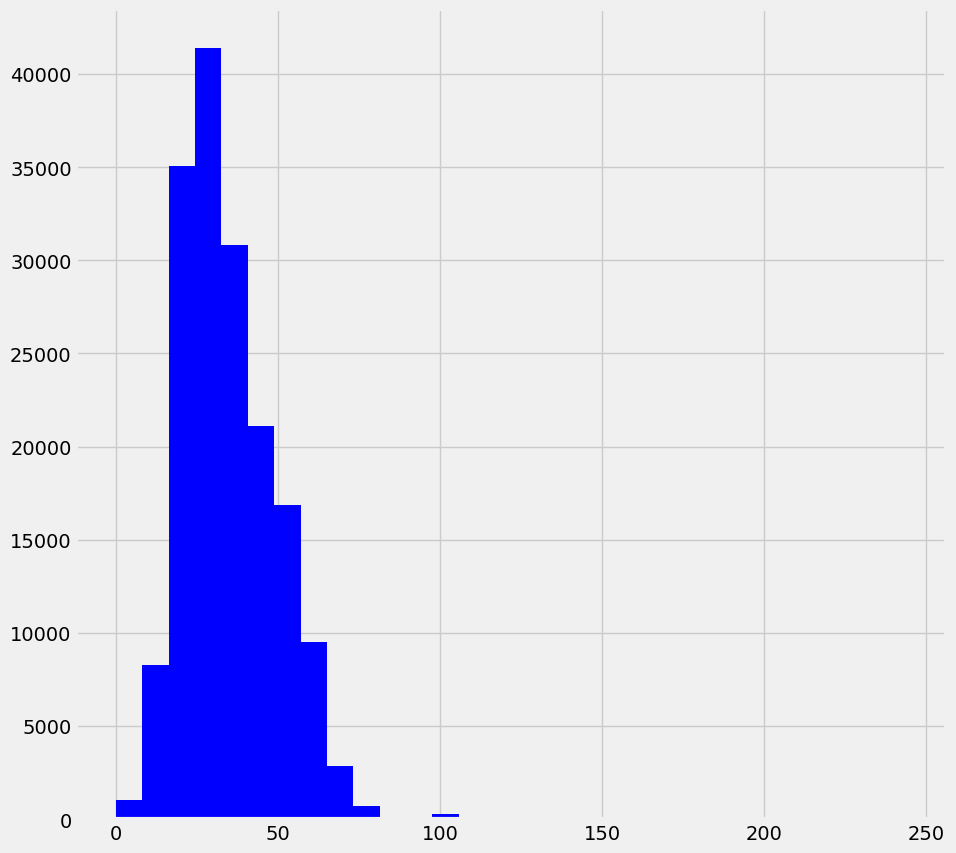

In [76]:
plt.figure(figsize=(10, 10))
users['Age'].hist(bins=30, color='blue')

#### Book Ratings 

In [77]:
ratings.shape

(1149780, 3)

In [78]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [79]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]
print('Ratings Shape:',ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

Ratings Shape: (1031136, 3)
(383842, 3)
(647294, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

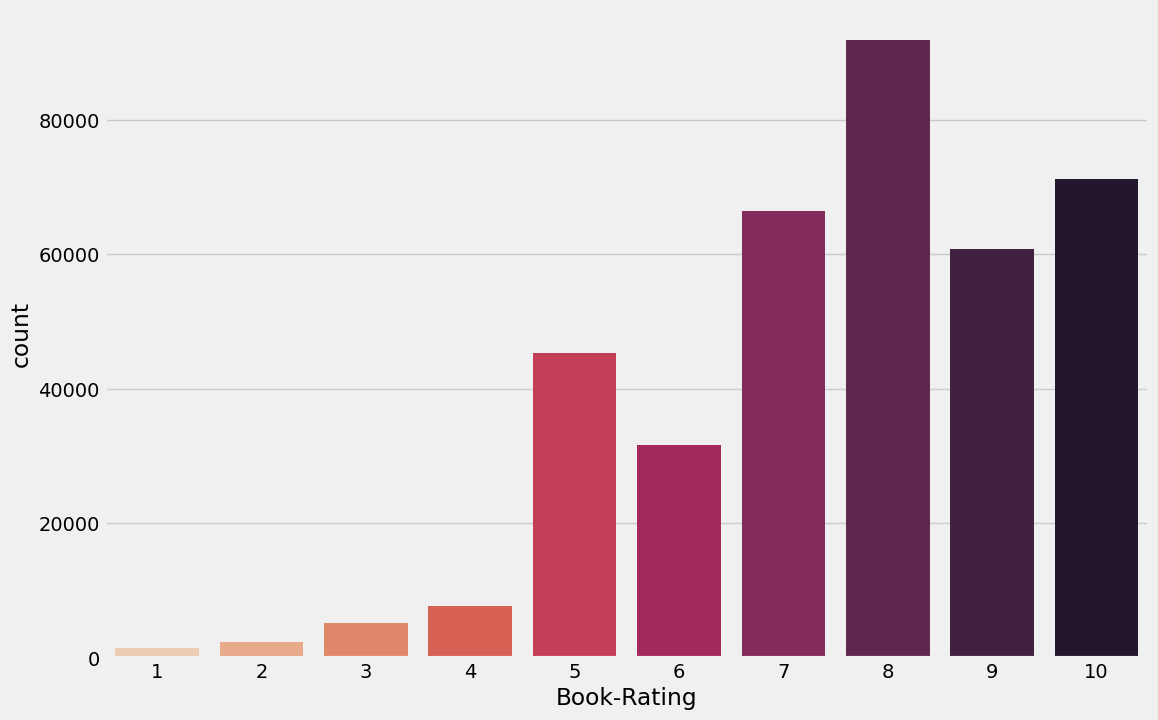

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

#### Merging our dataframes in order to have one dataframe containing which books have what ratings, which users made which ratings, etc.

In [81]:
book_ratings = books.merge(ratings, on="ISBN")
user_ratings = users.merge(ratings, on="User-ID")

In [82]:
book_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [83]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book-Title           1031136 non-null  object
 2   Book-Author          1031134 non-null  object
 3   Year-Of-Publication  1031136 non-null  object
 4   Publisher            1031134 non-null  object
 5   Image-URL-S          1031136 non-null  object
 6   Image-URL-M          1031136 non-null  object
 7   Image-URL-L          1031132 non-null  object
 8   User-ID              1031136 non-null  int64 
 9   Book-Rating          1031136 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 78.7+ MB


In [84]:
user_ratings.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [85]:
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   Location     1149780 non-null  object 
 2   Age          840288 non-null   float64
 3   ISBN         1149780 non-null  object 
 4   Book-Rating  1149780 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.9+ MB


In [86]:
user_ratings['User-ID'].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
118579        1
118576        1
118574        1
118563        1
139146        1
Name: count, Length: 105283, dtype: int64

#### Dataframes that will contain the ratings for the books

In [87]:
num_book_ratings = book_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index().rename(columns={'Book-Rating': 'Num-Ratings'})
avg_book_ratings = book_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index().rename(columns={'Book-Rating': 'Avg-Ratings'})
final_ratings = num_book_ratings.merge(avg_book_ratings , on = 'Book-Title')

In [88]:
final_ratings.head()

,Book-Title,Num-Ratings,Avg-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [89]:
final_ratings['Num-Ratings'].unique()

array([   4,    1,    2,   10,    9,   11,   17,    3,    5,   47,    8,
          6,   12,   22,    7,   61,   13,   23,   37,   28,   65,   14,
         20,  284,  509,   24,   25,   90,   21,   71,   57,  106,   30,
        356,   85,  151,   16,   50,   31,  125,   41,   74,   44,   46,
         32,   18,  136,   15,  346,   35,   29,   26,   38,  236,   27,
        265,  156,   33,   52,   83,   67,   81,  139,   92,   54,  108,
         39,  140,  116,   40,   42,   34,   48,  169,  104,   99,  302,
        285,   86,  192,  109,   59,   75,  128,  174,  327,   19,   49,
         36,   51,   66,  838,   68,  149,   64,   82,   63,   76,  413,
         60,   56,  118,   78,   45,   95,   62,   43,   97,  135,  210,
        549,   96,  101,  164,  205,  378,  273,   53,  158,  150,   70,
         69,  279,  262,  121,  126,   77,  141,  332,  112,   84,  187,
         58,  258,   55,  184,  147,  304,  110,   93,  114,   91,   72,
         94,   80,  326,  222,  170,  670,  167,  2

In [90]:
final_ratings['Num-Ratings'].max()

2502

In [91]:
final_ratings['Num-Ratings'].min()

1

In [92]:
final_ratings['Num-Ratings'].mean()

4.277312492999988

### Recommender System 1: Popularity-Based Filtering

In [93]:
popular_book_threshold = 200
num_popular_books = 100

In [94]:
popular_books = final_ratings[final_ratings['Num-Ratings'] > popular_book_threshold].sort_values(by='Avg-Ratings', ascending=False).reset_index(drop=True).head(num_popular_books)

### Listing the top 10 popular books

In [95]:
popular_books.head()

,Book-Title,Num-Ratings,Avg-Ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
4,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639


#### confirming the popular list satisfies the thresholds established above

In [96]:
popular_books['Num-Ratings'].unique().min()

201

## Collaborative-Based Filtering

#### Creating thresholds in order for easy modifications

In [97]:
user_rating_threshold = 100
num_book_ratings_threshold = 50

#### Eliminating the bias of users who have small amounts of ratings

In [98]:
X = book_ratings.groupby('User-ID').count()['Book-Rating'] > user_rating_threshold

In [99]:
target_users = X[X].index
book_ratings = book_ratings[book_ratings['User-ID'].isin(target_users)]

In [100]:
y  = book_ratings.groupby('Book-Title')['Book-Rating'].count() >= num_book_ratings_threshold
pop_books = y[y].index

final = book_ratings[book_ratings['Book-Title'].isin(pop_books)]

#### Establish Table with the information needed to calculate the cosine similarity

In [101]:
pt = final.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)
pt.head()

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

##### cosine = np.dot(A,B)/(norm(A)*norm(B))

#### Calculate cosine similarity

In [103]:
similarity_scores = cosine_similarity(pt)

#### Function to return the recommended books

In [104]:
def make_recommendation(book_title):
    index = np.where(pt.index == book_title)[0][0]
    recommendations = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:6]
    book_list = []
    for book in recommendations:
        book_list.append(pt.index[book[0]])
        print(pt.index[book[0]])
    
    return book_list

#### Display the recommended books

In [107]:
book_rec = make_recommendation('24 Hours')

The Day After Tomorrow
The Switch
The Little Friend
Doomsday Book
The Blue Nowhere : A Novel


## Conclusion
    In this notebook we explored how to build a recommender system using Popularity-Based Filtering and Collaborative Filtering using cosine similarity. Our Popularity-Based Filtering displays the top 100 books based on the number of ratings and the average rating for each book. Then we created a Collaborative Filtering model utilizing the unsupervised learning metric, cosine similarity, to recommend books that are similar to the book provided in the fucntion. Both methods have their own advantages and use cases. If you are wanting to recommend books that are most enjoyed by everyone on your platform, then popularity-based filtering is best for you. However, if you want more personalized recommendations based off a book you have already read or are interested in, then collaborative filtering is best for you. 